<a href="https://colab.research.google.com/github/ann-macharia/Hass-consult-house-price-prediction/blob/master/7_IP_CORE_WEEK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist,working for Hass Consulting real estate company, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. I am to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

The metric for success in this project will be a well fitted and fairly accurate regression model that will optimumly predict the price of a house given features that it has learned from.

### c) Understanding the context 

The housing sector in Kenya continues to grow everyday. There is continuous growth in demand for housing as the population increases. With this market growing, many real estate companies have been established, all bringing the housing commodity to the citizens. Housing prices are affected by many factors including, micro economic factors like customers, competitors,suppliers etc.and macro economic factors including demographic, technological, political forces etc. Keeping all this factors constant, this project will focus on predicting the price of houses given its physical features.

### d) Recording the Experimental Design

The main aim of the project is to create a predictive model for house prices for the real estate company Hass consulting. Data cleaning and exploratory data analysis will be done before creating the model and evaluation of the model and a final documentation of the project.

### e) Data Relevance

The data contains football matches in various tornaments since 1872 all the way to 2018, this means the data is time appropriate. The data contains the scores, the ranking, teams, tournament type. The data contains more than 100,000 rows which means its enough for building a model.



## 2. Reading the Data

In [0]:
#Importing Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


In [0]:
# Loading the Dataset
df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
print(df.shape)

(21613, 20)


In [0]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Checking whether each column has an appropriate datatype
#
df.info()

#Variables that do not have the correct data_tpe include.
#id, condition, grade, zipcode, 
w_cl = ['id', 'zipcode', 'condition', 'grade']
for i in w_cl:
  df[i] = df[i].astype(str)
  df[i]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

       bathrooms  bedrooms  condition  ...  yr_built  yr_renovated  zipcode
0           True      True      False  ...      True         False    False
1           True      True      False  ...      True          True    False
2           True      True      False  ...      True         False    False
3           True      True      False  ...      True         False    False
4           True      True      False  ...      True         False    False
...          ...       ...        ...  ...       ...           ...      ...
21608       True      True      False  ...      True         False    False
21609       True      True      False  ...      True         False    False
21610       True      True      False  ...      True         False    False
21611       True      True      False  ...      True         False    False
21612       True      True      False  ...      True         False    False

[21613 rows x 20 columns]


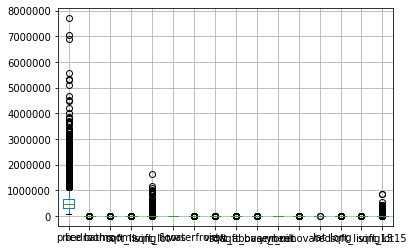

In [0]:
# Checking for Outliers
#
Q1=df.quantile(0.75)
Q3=df.quantile(0.25)

IQR = Q3-Q1
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

df.boxplot()
  

In [0]:
#Checking for duplicates.
df.duplicated().sum()

#3 duplicates detected.
#Dropping the duplicates.

df = df.drop_duplicates()

#checking if the duplicates are dropped.
df.duplicated().sum()

#All duplicates are dropped.

0

In [0]:
# Identifying the Missing Data
#
df.isnull().sum().any()

#There is no missing data.

False

# 6. Exploratory Data Analysis

## Univariate analysis

In [0]:
import pandas_profiling as pp
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,21
Number of observations,21610
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,16
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Insights from the pandas profiling.

1) Some variables have a very low cardinality and hence are not good for machine learning.

These include: view, waterfont, year_renovated. These variables can be dropped before machine learning can be dropped.



## Bivariate analsis

In [0]:
#Correlation matrix.
w = df.corr()
w

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.605569,0.323849,0.053980,0.126503,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.477619,0.303077,0.154276,0.018695,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,0.685351,0.283814,0.505997,0.050879,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,0.876600,0.435054,0.318099,0.055314,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,0.183527,0.015271,0.053105,0.007677,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,0.523874,-0.245673,0.489347,0.006156,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.072080,0.080585,-0.026159,0.092950,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.167659,0.276996,-0.053229,0.103208,0.006049,-0.078560,0.280404,0.072577
sqft_above,0.605569,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,1.000000,-0.051923,0.423922,0.023233,-0.000823,0.343791,0.731870,0.194060
sqft_basement,0.323849,0.303077,0.283814,0.435054,0.015271,-0.245673,0.080585,0.276996,-0.051923,1.000000,-0.133062,0.071320,0.110535,-0.144743,0.200367,0.017260


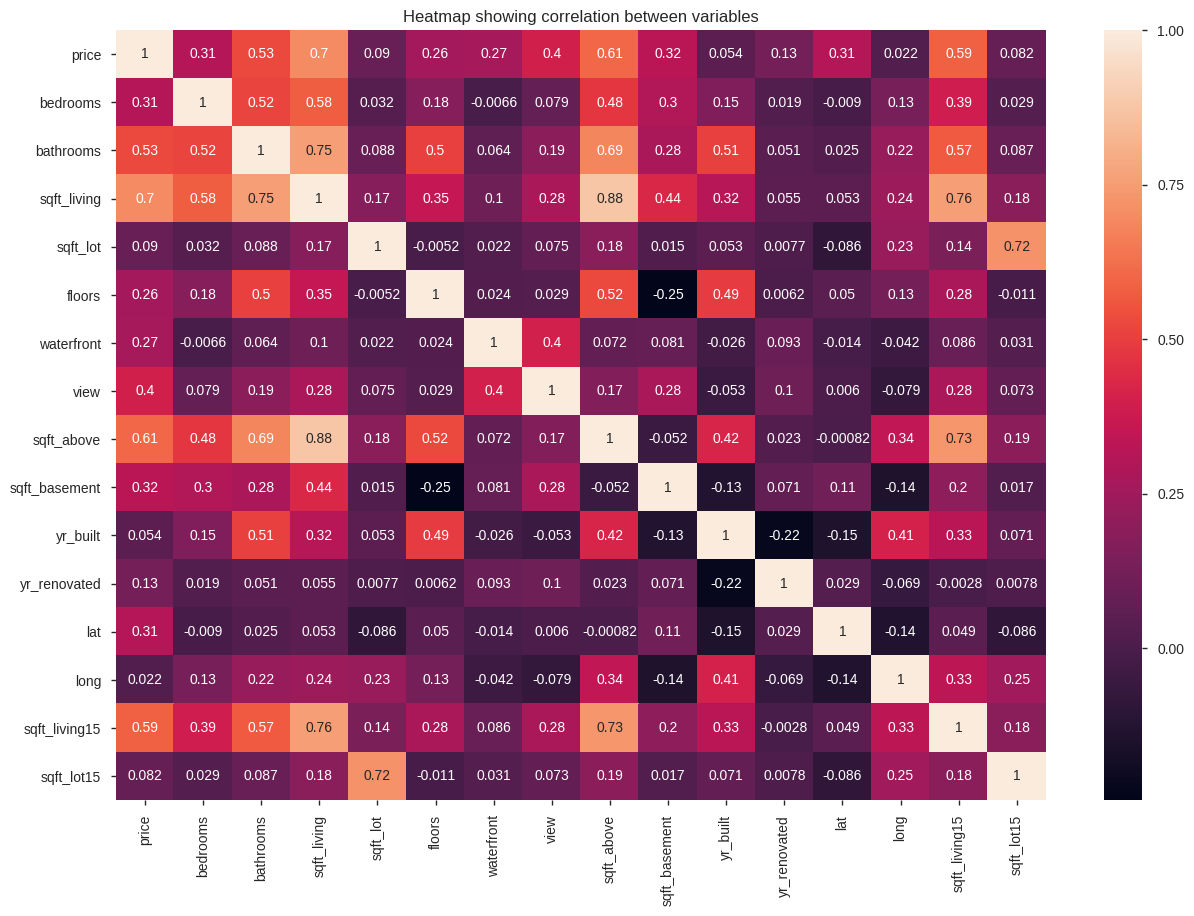

In [0]:
plt.figure(figsize = (15, 10))
sns.heatmap(w, annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

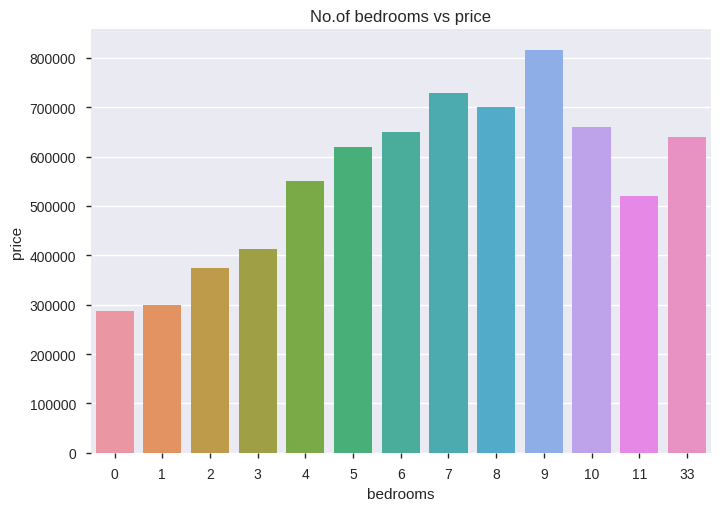

In [0]:
#Visualisation of bedrooms vs price

ax = sns.barplot(x = 'bedrooms', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='bedrooms',
       ylabel='price',
       title='No.of bedrooms vs price')
plt.show()



The general trend shows that as the number of bedrooms increase, we have a gradual increase in price. This happens upto a certain point and then starts decreasing.

## Multivariate analysis

In [0]:
#previewing the data.
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#Feature engineering.
#
#Creating a no.of years before renovation column.
#
df['house_age'] = 2019 - df['yr_built']


In [0]:
##Separating features and labels
X = df.drop(['id', 'yr_built', 'zipcode', 'lat','price','long'], 1)
      
y = df['price']

In [0]:
#Split the data into a training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.32905804e-01, 1.31336320e-01, 1.12333076e-01, 8.49808110e-02,
       6.94153966e-02, 5.61634843e-02, 4.58512786e-02, 4.01379678e-02,
       3.55634060e-02, 2.63653093e-02, 1.83289131e-02, 1.71713833e-02,
       1.59137855e-02, 1.35330649e-02, 4.43542554e-33])

# 7. Implementing the Solution

## Multiple Linear Regression

In [0]:
#Features:
#variables with low cardinality and those with no much useful information to be dropped. 
X = df.drop(['id', 'price', 'yr_built', 'yr_renovated','view', 'waterfront', 'lat', 'long', 'zipcode'], 1)
print (X.columns)

#Label:
y = df['price']

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'house_age'],
      dtype='object')


In [0]:
#Ensuring assumptions of multivariate collinearity are met.
#No mulitcolllinearity of the independent variables.
r = X.corr()
r

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,0.477619,0.303077,0.391633,0.029233,-0.154276
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.685351,0.283814,0.568665,0.087191,-0.505997
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.876600,0.435054,0.756420,0.183285,-0.318099
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.183527,0.015271,0.144620,0.718556,-0.053105
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.523874,-0.245673,0.279861,-0.011250,-0.489347
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,1.000000,-0.051923,0.731870,0.194060,-0.423922
sqft_basement,0.303077,0.283814,0.435054,0.015271,-0.245673,-0.051923,1.000000,0.200367,0.017260,0.133062
sqft_living15,0.391633,0.568665,0.756420,0.144620,0.279861,0.731870,0.200367,1.000000,0.183194,-0.326298
sqft_lot15,0.029233,0.087191,0.183285,0.718556,-0.011250,0.194060,0.017260,0.183194,1.000000,-0.070999
house_age,-0.154276,-0.505997,-0.318099,-0.053105,-0.489347,-0.423922,0.133062,-0.326298,-0.070999,1.000000


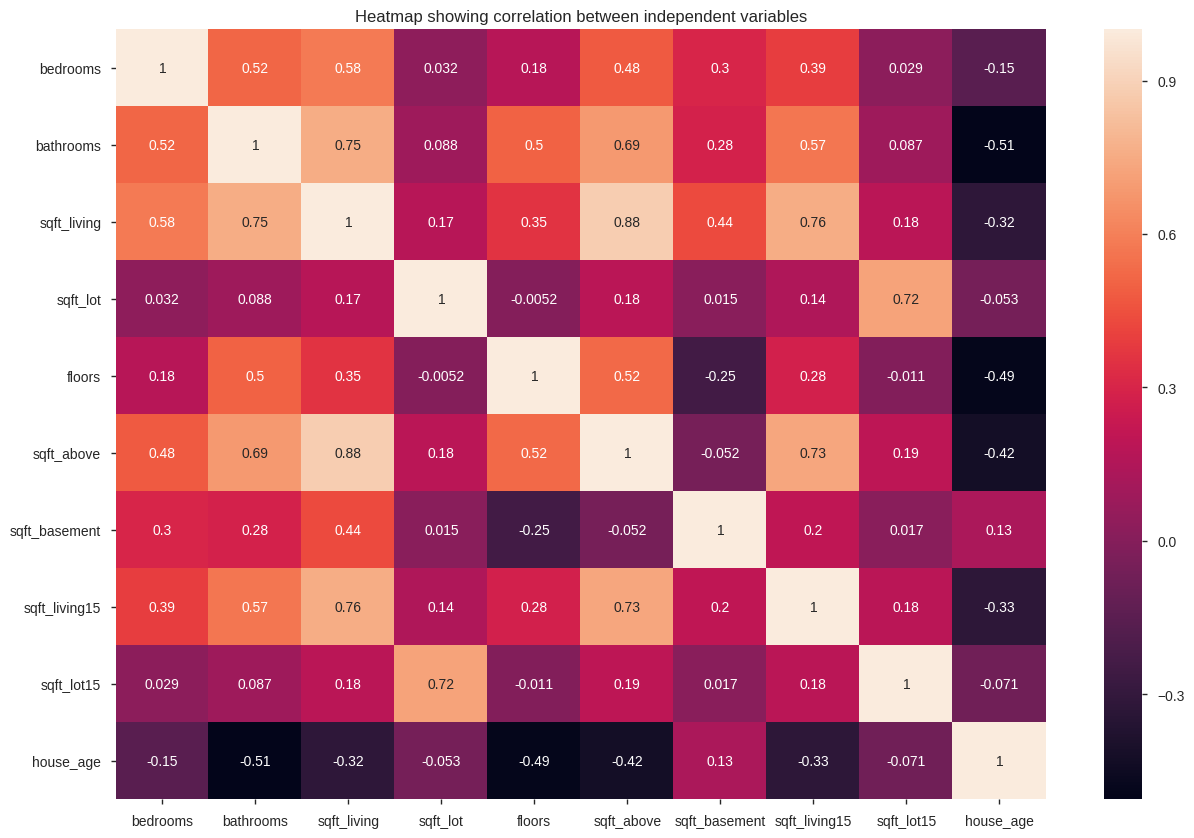

In [0]:
plt.figure(figsize = (15, 10))
sns.heatmap(r, annot = True) 
plt.title('Heatmap showing correlation between independent variables')
plt.show()

From the heatmap above, some variable pairs are seen to have high correlation, these include: (sqft_living and sqft_living15), (sqft_lot and sqft_lot15), (sqft_living15 and sqft_above), (sqft_living and sqft_above), (sqft_living and bathrooms). To reduce this high correlation some columns need be dropped.
These include: sqft_living15, sqft_lot15, sqft_above, bathrooms



Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_basement', 'house_age'],
      dtype='object')

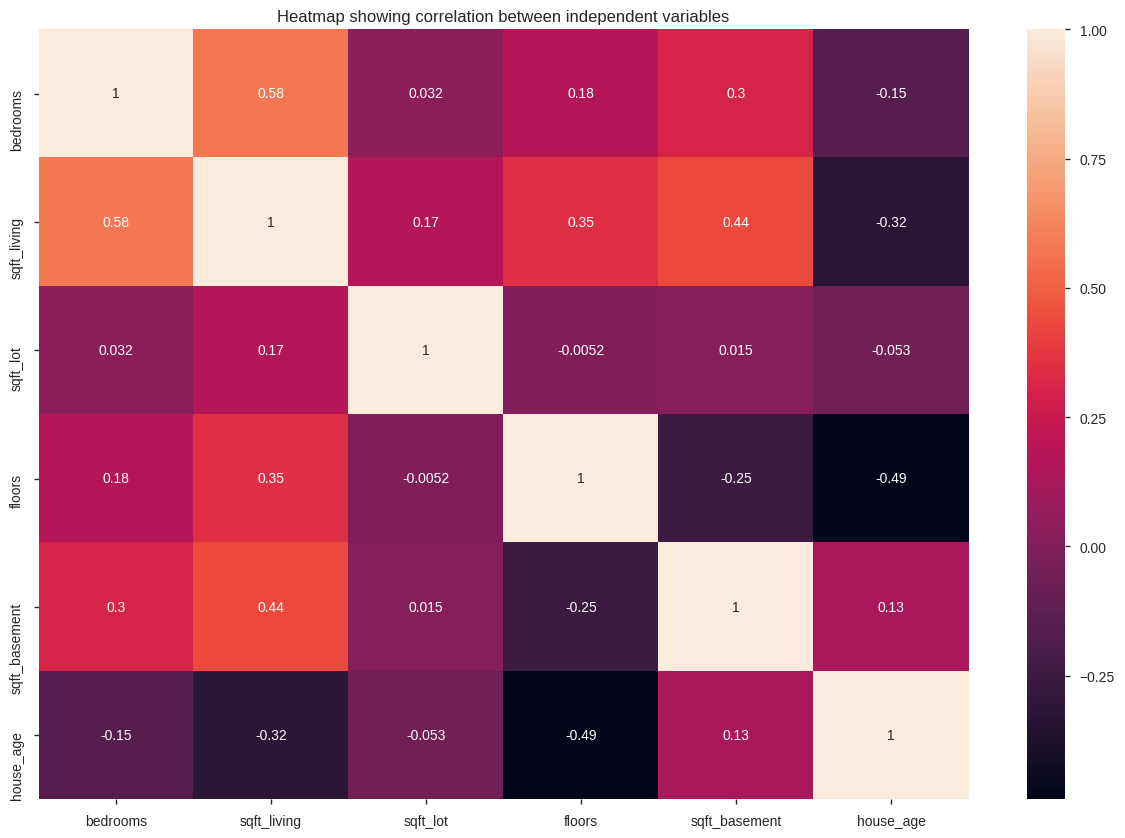

In [0]:
A = X.drop(['sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms'], axis=1)
c = A.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(c, annot = True) 
plt.title('Heatmap showing correlation between independent variables')
plt.show()

A.columns


After dropping those variables, the independent variables have little multcollinearity.

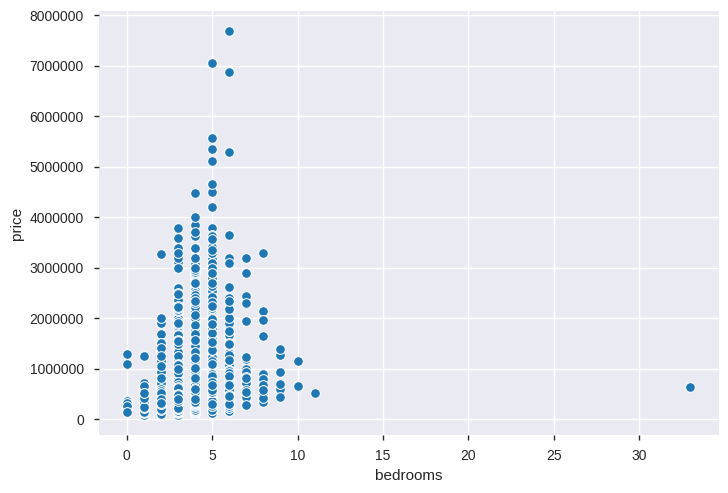

In [0]:
ax1 = sns.scatterplot(x= A['bedrooms'], y=df['price'])
#There is linear relationship between bedrooms and sqft_living


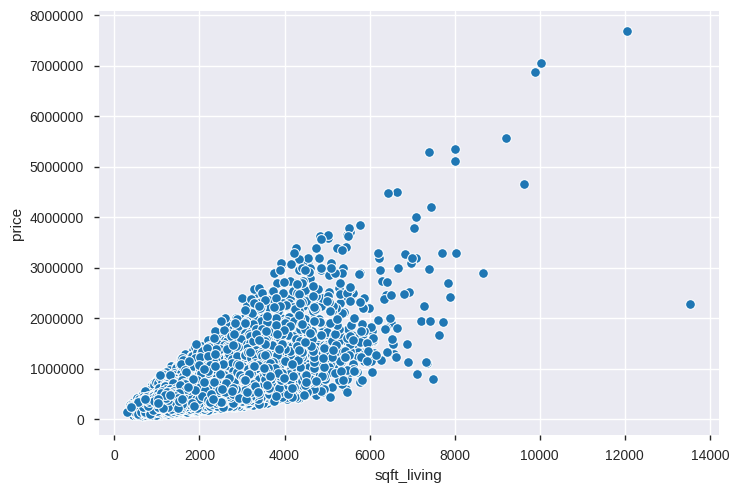

In [0]:
ax2 = sns.scatterplot(x= A['sqft_living'], y=df['price'])
#There is linear relationship between price and sqft_living

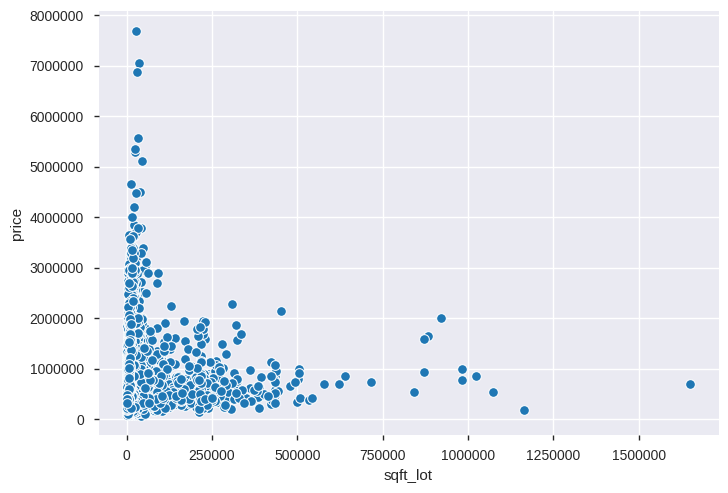

In [0]:
ax3 = sns.scatterplot(x = A['sqft_lot'], y=df['price'])
#There is linear relationship between price and sqft_lot

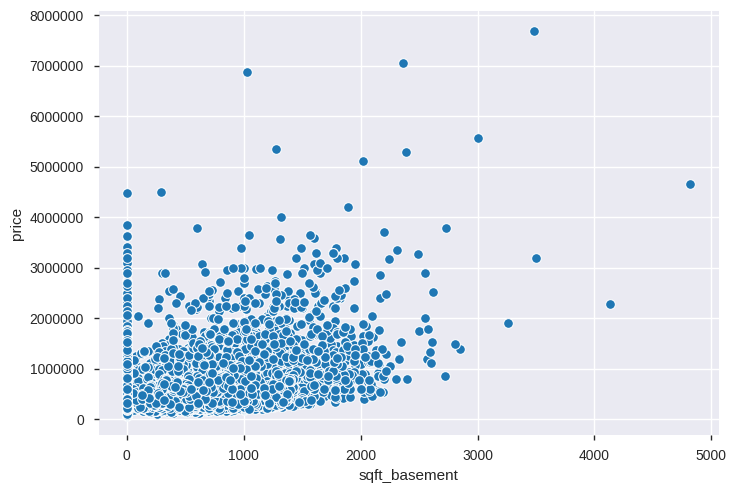

In [0]:
ax4 = sns.scatterplot(x= A['sqft_basement'], y=df['price'])
#There is linear relationship between price and sqft_basement

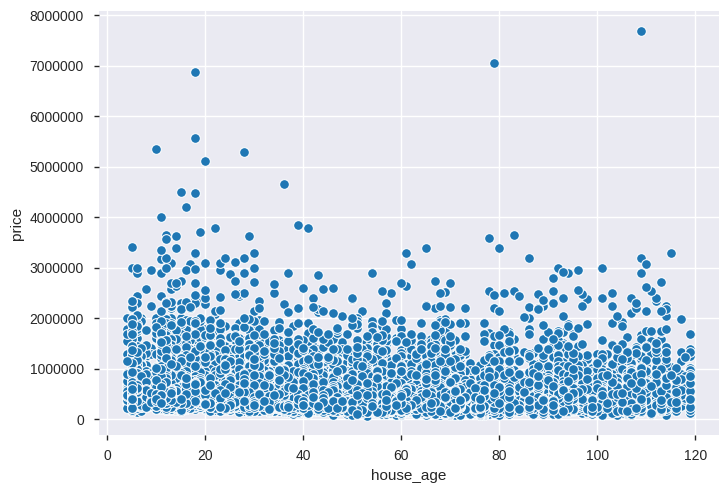

In [0]:
ax5 = sns.scatterplot(x= A['house_age'], y=df['price'])
#There no linear relationship between price and house_age

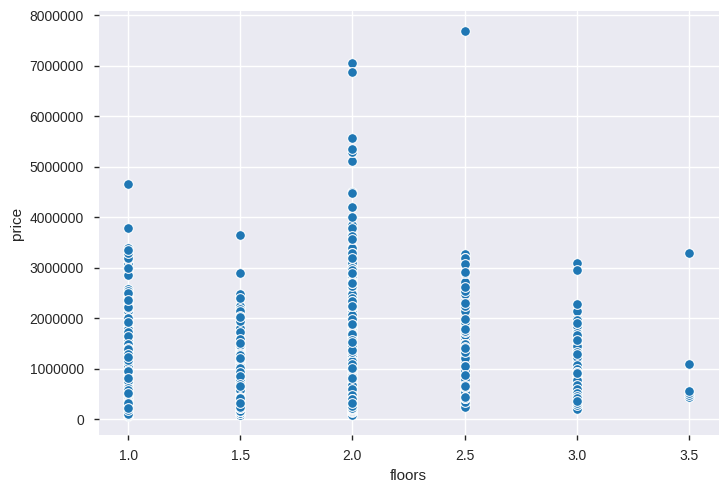

In [0]:
ax6 = sns.scatterplot(x= A['floors'], y=df['price'])
#There no linear relationship between price and floors

There no linear relationship between (price and floors) and 
(price and house_age). 
They will therefore be dropped.

In [0]:
A.drop(['house_age', 'floors'] ,axis=1, inplace = True)
A.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade',
       'sqft_basement'],
      dtype='object')

Assumptions of linear regression have been checked and now we can do modelling.

In [0]:
# Dividing our data into training and test sets
# 
from sklearn.model_selection import train_test_split
A_train, A_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state=0)

In [0]:
#  Training the Algorithm
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(A_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Printing out the intercept and the coefficients.
print (regressor.intercept_ )

coeff_df = pd.DataFrame(regressor.coef_, A.columns, columns=['Coefficient'])
coeff_df

-744157.1725862412


,Coefficient
bedrooms,-48640.042108
sqft_living,196.898581
sqft_lot,-0.257860
condition,60912.632929
grade,106534.633599
sqft_basement,61.620045


In [0]:
# Making Predictions
# 
y_pred = regressor.predict(A_test)

# To compare the actual output values for X_test with the predicted values
# 
A1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
A1


,Actual,Predicted
9790,680200.0,624166.804578
10280,550000.0,338821.042076
21572,230000.0,369092.361124
20060,379950.0,609088.240295
21204,1060000.0,896367.279579
...,...,...
17762,300000.0,117694.641277
13211,395000.0,702034.288399
8108,395000.0,654141.124863
19728,489000.0,455984.684492


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 157543.30293047053
Mean Squared Error: 55518585144.558205
Root Mean Squared Error: 235623.82125871358


In [0]:
from sklearn.metrics import r2_score
a = r2_score(y_test, y_pred)
a

0.6173734254321714

### Checking for heteroskedasticity

#### Residual plot.

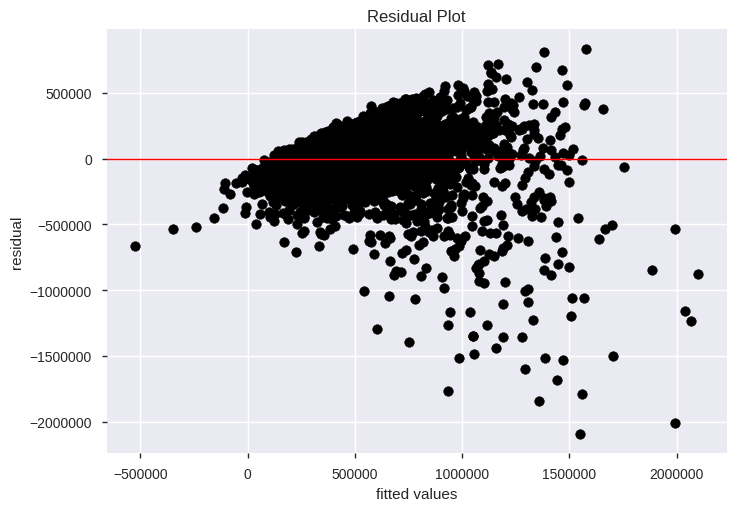

In [0]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


## Quantile regression

In [0]:
#Separating training and testing datasets
B = A.drop(['condition', 'grade'], 1) 
y = df['price']

from sklearn.model_selection import train_test_split
B_train, B_test, y_train, y_test = train_test_split(B,y, test_size=0.2, random_state=24)


In [0]:
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ B', df)
res = mod.fit(q=.5)

  # Then print out the summary of our model
  #
print(res.summary())
  

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2618
Model:                       QuantReg   Bandwidth:                   3.051e+04
Method:                 Least Squares   Sparsity:                    4.464e+05
Date:                Mon, 27 Jan 2020   No. Observations:                21610
Time:                        06:06:54   Df Residuals:                    21605
                                        Df Model:                            4
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.6e+05   5788.331     27.637      0.000    1.49e+05    1.71e+05
B[0]        -5.42e+04   2009.776    -26.969      0.000   -5.81e+04   -5.03e+04
B[1]         251.8877      2.191    114.977      0.000     247.594     256.182
B[2]          -0.2033      0.037     -5.432      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [0]:
# Making Predictions
# 
y_pred = res.predict(B)

# To compare the actual output values for X_test with the predicted values
# 
B1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
B1


,Actual,Predicted
0,221900.0,293443.116886
1,538000.0,651524.827723
2,180000.0,243486.894075
3,604000.0,454685.988820
4,510000.0,418893.002794
...,...,...
21608,360000.0,382522.384384
21609,400000.0,523841.098981
21610,402101.0,308217.108207
21611,400000.0,399899.009302


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 163824.56330337754
Mean Squared Error: 70407938664.17726
Root Mean Squared Error: 265344.94278990367


In [0]:
from sklearn.metrics import r2_score
b = r2_score(y, y_pred)
b

0.47833370902371386

## Ridge regression

### Model creation

Ridge regression deals with multicollinearity hence no need to drop the variable that are correlated

In [0]:
# identifying features and labels.
D =  df.drop(['id', 'price', 'yr_built', 'yr_renovated','view', 'waterfront', 'lat', 'long', 'zipcode'], 1)
print (D.columns)

y = df['price']

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'house_age'],
      dtype='object')


In [0]:
# Splitting the dataset into training and testing sets
#
D_train, D_test, y_train, y_test = train_test_split(D, y, test_size = 0.25, random_state = 101)

In [0]:
# Training the model
#
ridge = Ridge(normalize=True)
ridge.fit(D_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [0]:
# Making predictions
#
y_pred = ridge.predict(D_test)

# To compare the actual output values for X_test with the predicted values
# 
D1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
D1


,Actual,Predicted
21202,450800.0,632215.406586
8457,350000.0,321923.297389
1611,378000.0,442427.537445
9736,292000.0,410242.566687
11752,302500.0,523907.745451
...,...,...
2747,726000.0,765835.858411
20334,425000.0,475569.727787
20592,969990.0,985349.702106
2333,555000.0,742998.969440


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 149743.13194450765
Mean Squared Error: 61432156354.73779
Root Mean Squared Error: 247855.1116171256


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5482664274446063

### Hyperparameter tuning for optimal parameters

In [0]:
ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [0]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(D,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 0.01}


51909809733.48158

### Training the model with optimal parameters

In [0]:
# Training the model with the optimal alpha value
#
ridge = Ridge(normalize=True, alpha = 0.01 )
ridge.fit(D_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [0]:
# Making predictions
#
y_pred = ridge.predict(D_test)

# To compare the actual output values for X_test with the predicted values
# 
D2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
D2

,Actual,Predicted
21202,450800.0,6.390848e+05
8457,350000.0,3.253131e+05
1611,378000.0,3.547847e+05
9736,292000.0,4.060164e+05
11752,302500.0,4.639176e+05
...,...,...
2747,726000.0,7.390157e+05
20334,425000.0,3.486201e+05
20592,969990.0,1.071353e+06
2333,555000.0,9.412196e+05


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 143747.8449186567
Mean Squared Error: 51002957177.559944
Root Mean Squared Error: 225838.34301898326


In [0]:
from sklearn.metrics import r2_score
c = r2_score(y_test, y_pred)
c

0.6249562212391389

### Performing cross validation

In [0]:
# Performing cross validation of ten folds
#
scores = cross_val_score(ridge, D, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 227837.24395603544
Standard deviation of the cross validation scores is 7161811000.972


### Checking for heterskedasticity

#### Residual plot

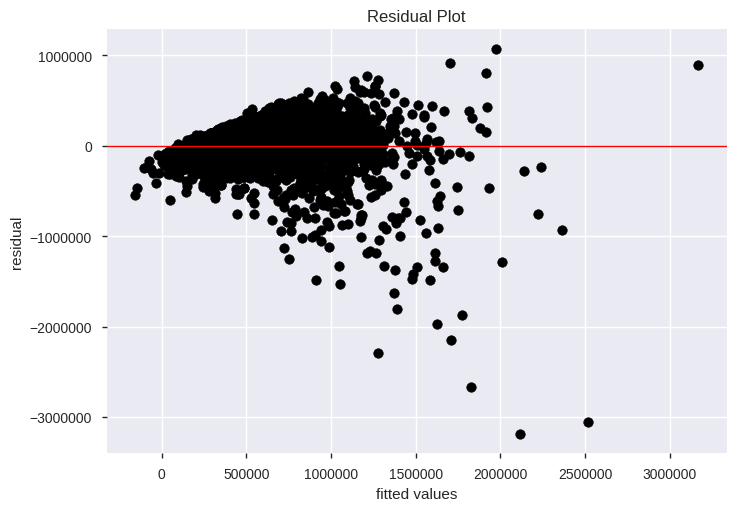

In [0]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


## Lasso regression

Lasso regression deals with multicollinearity hence no need to drop the variable that are correlated

### Model Creation

In [0]:
# identifying features and labels.
P =  X.drop(['sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms'], axis=1)

y = df['price']


In [0]:
# Splitting the dataset into training and testing sets
#
P_train, P_test, y_train, y_test = train_test_split(P, y, test_size = 0.25, random_state = 101)

In [0]:
# Training the model
#
lasso = Lasso(normalize=True)
lasso.fit(P_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [0]:
# Making predictions
#
y_pred = lasso.predict(P_test)

# To compare the actual output values for X_test with the predicted values
# 
P1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
P1


,Actual,Predicted
21202,450800.0,6.451120e+05
8457,350000.0,3.243799e+05
1611,378000.0,3.462596e+05
9736,292000.0,4.426027e+05
11752,302500.0,4.627312e+05
...,...,...
2747,726000.0,7.228178e+05
20334,425000.0,3.181022e+05
20592,969990.0,1.083697e+06
2333,555000.0,8.978960e+05


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 145247.99213770643
Mean Squared Error: 52032427561.02999
Root Mean Squared Error: 228106.17606945673


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6173861413044625

### Hyperparameter tuning for optimal parameters

In [0]:
lasso=Lasso(normalize=True)
search=GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [0]:
# # We will now fit our model and display the best parameters and the best results we can get with that setup.
# # 
# search.fit(P,y)
# print (search.best_params_)
# abs(search.best_score_)

### Training model with optimal parameters

In [0]:
# Training the model with the optimal alpha value
#
lasso = Lasso(normalize=True, alpha =1e-05 )
lasso.fit(P_train, y_train)


Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# Making predictions
#
y_pred = lasso.predict(P_test)
y_pred

# To compare the actual output values for P_test with the predicted values
# 
P2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
P2

,Actual,Predicted
21202,450800.0,6.448986e+05
8457,350000.0,3.243600e+05
1611,378000.0,3.457269e+05
9736,292000.0,4.425320e+05
11752,302500.0,4.624503e+05
...,...,...
2747,726000.0,7.224248e+05
20334,425000.0,3.179578e+05
20592,969990.0,1.083848e+06
2333,555000.0,8.988773e+05


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 145292.9064113679
Mean Squared Error: 52034156818.057205
Root Mean Squared Error: 228109.96650312588


In [0]:
from sklearn.metrics import r2_score
d = r2_score(y_test, y_pred)
d

0.6173734254321714

### Perfoming cross validation

In [0]:
# Performing cross validation of ten folds
#
scores = cross_val_score(lasso, P, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 228973.93960958527
Standard deviation of the cross validation scores is 6611175628.391


### Checking for heteroskedasticity

#### Residual plot

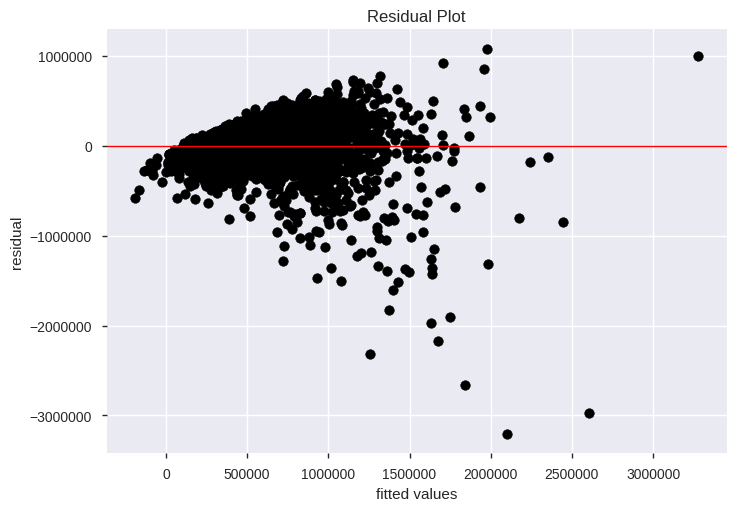

In [0]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


## Elastic Net Regression

### Model Creation

In [0]:
# identifying features and labels.
M = df.drop(['id', 'price', 'yr_built', 'yr_renovated','view', 'waterfront', 'lat', 'long', 'zipcode'], 1)
M.columns

y = df['price']


In [0]:
# Splitting the dataset into training and testing sets
#
M_train, M_test, y_train, y_test = train_test_split(M, y, test_size = 0.25, random_state = 101)

In [0]:
# Training the model
#
elastic = ElasticNet(normalize=True)
elastic.fit(M_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# Making predictions
#
y_pred = elastic.predict(M_test)

# To compare the actual output values for X_test with the predicted values
# 
M1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
M1


,Actual,Predicted
21202,450800.0,538573.266895
8457,350000.0,538299.409325
1611,378000.0,538426.769852
9736,292000.0,538363.041816
11752,302500.0,538497.803996
...,...,...
2747,726000.0,538664.303107
20334,425000.0,538471.633271
20592,969990.0,538783.119228
2333,555000.0,538537.969725


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 234902.55940877702
Mean Squared Error: 135963898382.22841
Root Mean Squared Error: 368732.827915048


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.00020671258716531415

### Hyperparameter tuning for optimal parameters

In [0]:
elastic = ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [0]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(M,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05}


52319923150.97918

### Training the model with optiml parameters

In [0]:
# Training the model with the optimal alpha value
#
elastic = ElasticNet(normalize=True, alpha =1e-05)
elastic.fit(M_train, y_train)


ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# Making predictions
#
y_pred = elastic.predict(M_test)

# To compare the actual output values for X_test with the predicted values
# 
M2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
M2

,Actual,Predicted
21202,450800.0,6.310093e+05
8457,350000.0,3.204170e+05
1611,378000.0,3.663524e+05
9736,292000.0,4.048091e+05
11752,302500.0,4.715658e+05
...,...,...
2747,726000.0,7.487656e+05
20334,425000.0,3.747357e+05
20592,969990.0,1.070869e+06
2333,555000.0,9.124505e+05


In [0]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 142300.26554690747
Mean Squared Error: 51305224216.64906
Root Mean Squared Error: 226506.5655045104


In [0]:
from sklearn.metrics import r2_score
e = r2_score(y_test, y_pred)
e

0.6227335388926979

### Performing cross validation

In [0]:
# Performing cross validation of ten folds
#
scores = cross_val_score(elastic, M, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 228735.4873013346
Standard deviation of the cross validation scores is 7544644559.553


### Checking for heteroskedasticity

#### Residual plot

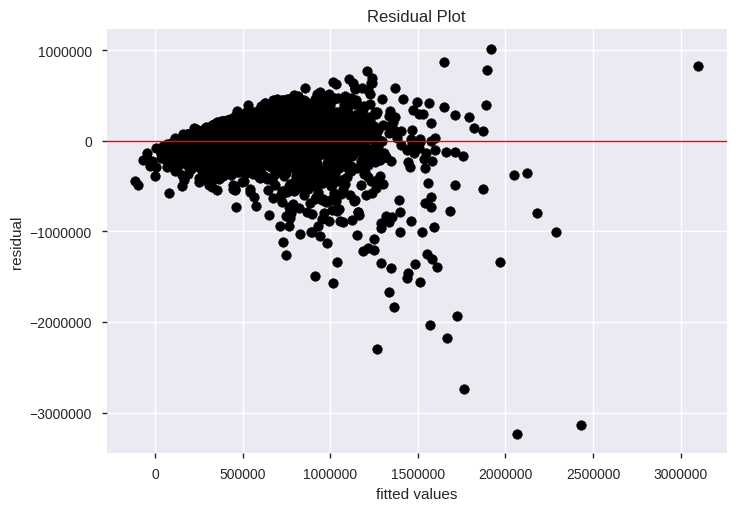

In [0]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


# Conclusion

In [217]:
#Models vs r2 score.
models = ['multivariate', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
conc = pd.DataFrame({'models': models, 'r2_scores': r2_scores})
conc

,models,r2_scores
0,multivariate,0.617373
1,quantile,0.478334
2,ridge,0.624956
3,lasso,0.617373
4,elastic,0.622734


Most of the models have an r2 score of approximately 60%. The ridge regression model has the highest r2 score of 62.5%. 

# Challenging solution

An accuracy of 62.5% cant be said to be the best therefore further analysis of data need be done to further improve the model.